# TMDB MOVIE DATA ANALYSIS

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA LOADING AND OVERVIEW

In [2]:
#importing dataset

data=pd.read_csv(r"E:\Project\TMDB Dataset\top_rated_movies(tmdb).csv")

In [3]:
data.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,5.522,8.708,27883
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,5.317,8.689,21151
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,4.747,8.570,12771
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,4.457,8.567,16219
4,1356039,Counterattack,When a hostage rescue mission creates a new en...,2025-02-27,9.430,8.524,431


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8560 non-null   int64  
 1   title         8560 non-null   object 
 2   overview      8560 non-null   object 
 3   release_date  8558 non-null   object 
 4   popularity    8560 non-null   float64
 5   vote_average  8560 non-null   float64
 6   vote_count    8560 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 468.3+ KB


# DATA CLEANING AND PREPROCESSING

In [5]:
#converting release date into datetime
data["release_date"]=pd.to_datetime(data["release_date"])

In [6]:
#checking data with same titles
data[data["title"].isin(data["title"].value_counts()[data["title"].value_counts() > 1].index)].sort_values(by="title")

,id,title,overview,release_date,popularity,vote_average,vote_count
5,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,4.281,8.500,8956
885,12219,12 Angry Men,During the trial of a man accused of his fathe...,1997-08-17,3.643,7.700,381
2424,5176,3:10 to Yuma,"In Arizona in the late 1800s, infamous outlaw ...",2007-09-06,3.794,7.212,3679
2407,14168,3:10 to Yuma,"Dan Evans, a small time farmer, is hired to es...",1957-08-07,3.819,7.220,369
3875,17979,A Christmas Carol,Miser Ebenezer Scrooge is awakened on Christma...,2009-11-04,3.538,6.900,4643
...,...,...,...,...,...,...,...
6416,9902,Wrong Turn,Chris crashes into a carload of other young pe...,2003-05-30,3.531,6.363,2749
596,2721,Z,"Amid a tense political climate, the opposition...",1969-02-26,4.281,7.805,551
5414,623520,Z,A family find themselves terrorized by their e...,2019-09-19,3.828,6.580,324
1697,14433,Zulu,"In 1879, during the Anglo-Zulu War, man-of-the...",1964-01-22,3.531,7.400,525


In [7]:
#checking for duplicated data based on title and release date
data[data.duplicated(subset=['title', 'release_date'], keep=False)]

,id,title,overview,release_date,popularity,vote_average,vote_count
5208,1198870,Return,A girl is at school. Suddenly it's as if she c...,NaT,3.531,6.616,391
5435,733668,Return,Eyüp decides to cross mount Ararat looking for...,NaT,3.531,6.564,380


In [8]:
#Removing Null values
data.dropna(inplace=True)

In [9]:
#creating year and month columns 
data["release_year"]=data["release_date"].dt.year
data["release_month"]=data["release_date"].dt.month

# DATA ANALYSIS AND VISUALIZATION

In [10]:
#checking for latest year and earliest year
print(data.release_year.max())
print(data.release_year.min())

2025
1902


In [11]:
def classify_year_range(year):
    """Classify a given year into predefined year ranges."""
    if year < 1900:
        return "Before 1900"
    elif year < 1910:
        return "1900-1909"
    elif year < 1920:
        return "1910-1919"
    elif year < 1930:
        return "1920-1929"
    elif year < 1940:
        return "1930-1939"
    elif year < 1950:
        return "1940-1949"
    elif year < 1960:
        return "1950-1959"
    elif year < 1970:
        return "1960-1969"
    elif year < 1980:
        return "1970-1979"
    elif year < 1990:
        return "1980-1989"
    elif year < 2000:
        return "1990-1999"
    elif year < 2010:
        return "2000-2009"
    elif year < 2020:
        return "2010-2019"
    else:
        return "2020 & Later"

# Creating a year-range 
data["year_range"] = data["release_year"].apply(classify_year_range)


In [20]:
# Count movies per range
year_range_counts = data["year_range"].value_counts().sort_index()
year_range_counts

year_range
1900-1909          2
1910-1919          3
1920-1929         21
1930-1939         43
1940-1949         85
1950-1959        145
1960-1969        240
1970-1979        344
1980-1989        643
1990-1999       1020
2000-2009       1812
2010-2019       2939
2020 & Later    1261
Name: count, dtype: int64

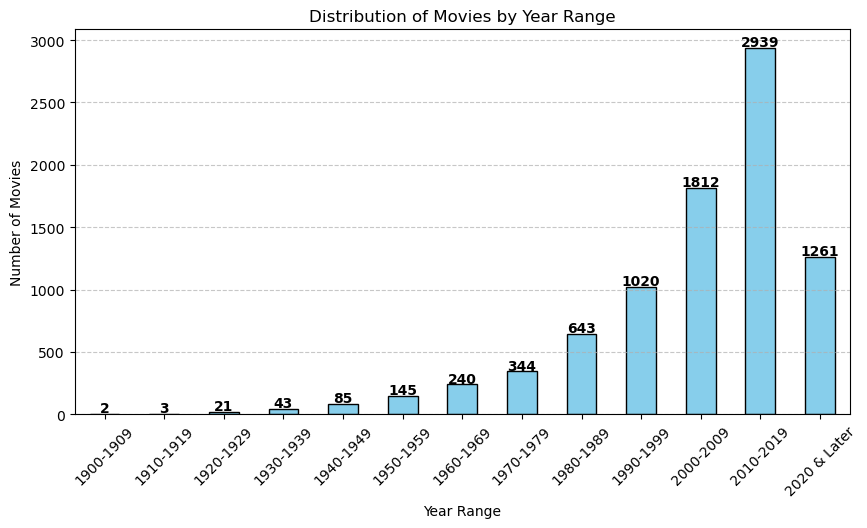

In [49]:
plt.figure(figsize=(10, 5))
ax = year_range_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Add labels on top of bars
for i, count in enumerate(year_range_counts):
    ax.text(i, count + (max(year_range_counts) * 0.005), str(count), ha='center', fontsize=10, fontweight='bold')

# Customize plot
plt.xlabel("Year Range")
plt.ylabel("Number of Movies")
plt.title("Distribution of Movies by Year Range")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

#show plot
plt.show()


In [45]:
#Top 5 movies per year_range based on popularity

# Sort the dataset by popularity in descending order
data_sorted = data.sort_values(by='popularity', ascending=False)

# Get top 5 movies for each year range
top_movies_by_range = data_sorted.groupby("year_range").head(5)

top_movies_by_range[["year_range","title","popularity"]].sort_values(by="year_range",ascending=False).reset_index(drop=True)

,year_range,title,popularity
0,2020 & Later,Moana 2,29.661
1,2020 & Later,Flight Risk,25.919
2,2020 & Later,Anora,20.921
3,2020 & Later,Mufasa: The Lion King,18.250
4,2020 & Later,The Gorge,27.269
5,2010-2019,Fury,7.791
6,2010-2019,Gone Girl,7.624
7,2010-2019,Chappie,7.531
8,2010-2019,The Avengers,6.957
9,2010-2019,The Hobbit: The Battle of the Five Armies,6.894


Text(0, 0.5, 'Average Popularity')

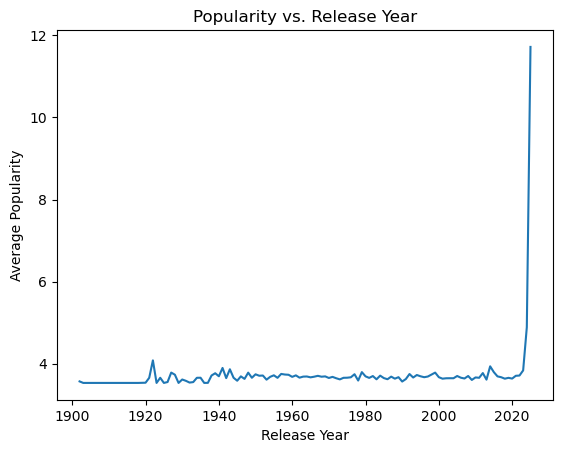

In [39]:
#plot showing popularity vs release year

sns.lineplot(x=data.groupby("release_year")["popularity"].mean().index, 
             y=data.groupby("release_year")["popularity"].mean().values)
plt.title("Popularity vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")

# KEY INSIGHTS

The insights from the Dataset containing  top-rated movies retrieved from The Movie Database (TMDB) API are given below:

##  Increase in Top-Rated Movies Over Time  
- The number of top-rated movies has **steadily increased since the 1970s**, with a **peak in the 2010-2019** decade (**2,939 movies**).  
- The decline after 2020 is because the data only goes up to **early 2025**.

##  Popularity Trends Among Top-Rated Movies  
- **Older classics (pre-2000) have lower popularity** compared to modern movies, suggesting that **newer movies dominate audience engagement**.  
- **Movies from 2020 onward show a massive spike in popularity**, indicating that recent top-rated movies receive more attention, likely due to:  
  -  **Streaming services (Netflix, Disney+, Prime Video, etc.)**  
  -  **Social media influence (TikTok, Twitter, YouTube, etc.)**  

##  Most Popular Top-Rated Movies by Era  

###  2020 & Later  
- *Moana 2*  
- *Flight Risk*  

###  2010-2019  
- *Fury*  
- *Gone Girl*  

###  2000-2009  
- *The Dark Knight*  
- *Gladiator*  

###  1990-1999  
- *Pulp Fiction*  
- *GoodFellas*  

###  1980-1989  
- *Die Hard*  
- *Full Metal Jacket*  

###  1960-1969  
- *Psycho*  
- *2001: A Space Odyssey*  

###  1920-1929  
- *Metropolis*  
- *The Passion of Joan of Arc*  

##  Shift in Audience Preferences  
- **Modern top-rated movies gain significantly more popularity than older classics.**  
- Audience engagement is now driven by:  
  -  **Accessibility** (*streaming platforms*)  
  -  **Marketing strategies** (*social media, trailers, online discussions*)  
